In [111]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [115]:
df = pd.read_csv("data.csv")   # Load the preprocessed dataset

features and targets

In [117]:
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
X_train = X_train.values.tolist()
X_test = X_test.values.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [123]:
for row in X_train:
    row.insert(0, 1)  # add 1 at front for intercept term

for row in X_test:
    row.insert(0, 1)  
      

initialising parameters 

In [125]:
theta = [0] * len(X_train[0])
alpha = 0.01  # learning rate
epochs = 500  # number of iterations

defining helper functions 

#### predcition function

In [127]:
def predict(x_row, theta):
    return sum([x * t for x, t in zip(x_row, theta)])

#### Computing cost (MSE)

In [129]:
def compute_cost(X, y, theta):
    total_error = 0
    for i in range(len(X)):
        error = predict(X[i], theta) - y[i]
        total_error += error ** 2
    return total_error / len(X)

#### Gradient descent step

In [131]:
def gradient_descent_step(X, y, theta, alpha):
    gradients = [0] * len(theta)
    m = len(X)
    for i in range(m):
        error = predict(X[i], theta) - y[i]
        for j in range(len(theta)):
            gradients[j] += error * X[i][j]
    for j in range(len(theta)):
        theta[j] -= (alpha * gradients[j]) / m
    return theta

#### Running training loop and measuring time

In [133]:
import time

cost_history = []
start_time = time.time()  # Start timing

for epoch in range(epochs):
    theta = gradient_descent_step(X_train, y_train, theta, alpha)  
    cost = compute_cost(X_train, y_train, theta)  
    cost_history.append(cost)

end_time = time.time()  # End timing

print("Final weights:", theta)
print()
print("Convergence Time:", end_time - start_time, "seconds")


Final weights: [194196.36711970338, -15374.727318099198, -20170.32028744112, 10805.874030985211, 8825.378313894817, 3888.352349175252, -13251.558787594204, 6080.40157909314, 89941.05466600359, 13728.497494807843, 125.95755395930706, 25503.60571366989, 26550.01148858846, 64209.92765607941]

Convergence Time: 50.55324745178223 seconds


#### Plotting cost vs iteration

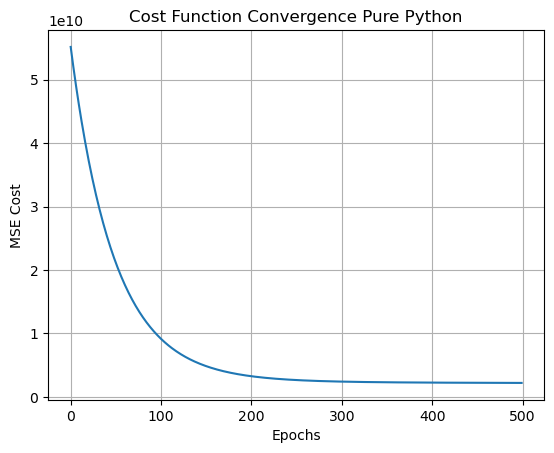

In [135]:
plt.plot(range(epochs), cost_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Cost")
plt.title("Cost Function Convergence Pure Python")
plt.grid(True)
plt.show()


#### Evaluation

In [138]:

def predict_multiple(X, theta):
    return [predict(x, theta) for x in X]

# Predict on training and test sets
y_train_pred = predict_multiple(X_train, theta)
y_test_pred = predict_multiple(X_test, theta)


def calculate_metrics(y_true, y_pred):
    n = len(y_true)
    mae = sum(abs(yt - yp) for yt, yp in zip(y_true, y_pred)) / n
    rmse = mse ** 0.5
    y_mean = sum(y_true) / n
    ss_tot = sum((yt - y_mean) ** 2 for yt in y_true)
    ss_res = sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred))
    r2 = 1 - (ss_res / ss_tot)
    return mse, rmse, r2


mae_train, rmse_train, r2_train = calculate_metrics(y_train, y_train_pred)
print(f"Train MAE: {mae_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train R² Score: {r2_train}")


mae_test, rmse_test, r2_test = calculate_metrics(y_test, y_test_pred)
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R² Score: {r2_test}")


Train MAE: 3314586077.4149776
Train RMSE: 57572.44199627959
Train R² Score: 0.8359649330725991
Test MAE: 3314586077.4149776
Test RMSE: 57572.44199627959
Test R² Score: 0.8127875434807676
